In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Load your CSV file
file_path = "GraspClassifierModel\data\F3_Duck.csv"  # Replace with the correct path
data = pd.read_csv(file_path)

# Extract positional data and labels
pos_x = data['Pos_x']
pos_y = data['Pos_y']
pos_z = data['Pos_z']
labels = data['Label']

# Simulated URDF positions (you can replace these with real URDF data if needed)
urdf_positions = [
    (0.1, 0.2, 0.3),
    (0.15, 0.25, 0.35),
    (0.2, 0.3, 0.4)
]
urdf_x, urdf_y, urdf_z = zip(*urdf_positions)

# Plotting the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
sc = ax.scatter(pos_x, pos_y, pos_z, c=labels, cmap='winter', alpha=0.6, marker='o', s=10)
cb = plt.colorbar(sc, ax=ax)
cb.set_label('Label (0 or 1)')

# Scatter plot for URDF positions
ax.scatter(urdf_x, urdf_y, urdf_z, c='red', marker='^', s=50, label='URDF Model')

# Set labels and title
ax.set_xlabel('Pos_x')
ax.set_ylabel('Pos_y')
ax.set_zlabel('Pos_z')
ax.set_title('3D Position Plot with URDF Simulation')
ax.legend()

plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data

# Load the CSV file (heatmap data)
file_path = 'GraspClassifierModel\\data\\F3_Duck.csv'  # 替换为你的实际文件路径
data = pd.read_csv(file_path)

# Extract relevant columns
positions = data[['Pos_x', 'Pos_y', 'Pos_z']]
labels = data['Label']

# Define grid size and create a 3D grid for heatmap visualization
grid_size = 30
x_bins = np.linspace(positions['Pos_x'].min(), positions['Pos_x'].max(), grid_size)
y_bins = np.linspace(positions['Pos_y'].min(), positions['Pos_y'].max(), grid_size)
z_bins = np.linspace(positions['Pos_z'].min(), positions['Pos_z'].max(), grid_size)

# Initialize a 3D grid to accumulate label values
heatmap = np.zeros((grid_size-1, grid_size-1, grid_size-1))

# Assign labels to the grid
for i in range(grid_size-1):
    for j in range(grid_size-1):
        for k in range(grid_size-1):
            # Select points in the current grid cell
            mask = (
                (positions['Pos_x'] >= x_bins[i]) & (positions['Pos_x'] < x_bins[i+1]) &
                (positions['Pos_y'] >= y_bins[j]) & (positions['Pos_y'] < y_bins[j+1]) &
                (positions['Pos_z'] >= z_bins[k]) & (positions['Pos_z'] < z_bins[k+1])
            )
            # Compute average label value in the cell
            if mask.any():
                heatmap[i, j, k] = labels[mask].mean()

# Flatten the grid and colorize the points
x_centers = (x_bins[:-1] + x_bins[1:]) / 2
y_centers = (y_bins[:-1] + y_bins[1:]) / 2
z_centers = (z_bins[:-1] + z_bins[1:]) / 2

x_grid, y_grid, z_grid = np.meshgrid(x_centers, y_centers, z_centers, indexing='ij')
heatmap_flat = heatmap.flatten()
nonzero_mask = heatmap_flat > 0  # Only plot cells with data

# Load URDF and extract mesh points with pybullet
p.connect(p.DIRECT)  # Use DIRECT mode to avoid GUI
p.setAdditionalSearchPath(pybullet_data.getDataPath())  # PyBullet's data path
robot_id = p.loadURDF("urdf\\Object\\duck\\duck_vhacd.urdf")  # Replace with your URDF file path

# Extract mesh vertices
mesh_points = []
visuals = p.getVisualShapeData(robot_id)  # Retrieve visual shapes
for visual in visuals:
    link_index = visual[1]  # Link index
    vertices = p.getMeshData(robot_id, linkIndex=link_index)[1]  # Mesh vertices
    mesh_points.extend(vertices)

mesh_points = np.array(mesh_points)

# Step 1: Align mesh points to target position
# Target position to align the mesh
target_position = np.array([-0.03, -0.4, 0.67])  # Desired world coordinates
# Calculate the current centroid of the mesh
mesh_centroid = mesh_points.mean(axis=0)
# Calculate the translation offset
translation_offset = target_position - mesh_centroid
# Apply the translation to the mesh points
transformed_mesh_points = mesh_points + translation_offset

# Step 2: Visualize heatmap and transformed mesh points together
fig = fig = plt.figure(figsize=(12, 8), dpi=500)
ax = fig.add_subplot(111, projection='3d')

# Plot heatmap with label-based colors
colors = np.where(heatmap_flat[nonzero_mask] > 0.5, 'lightgreen', 'blue')
sc = ax.scatter(
    x_grid.flatten()[nonzero_mask],
    y_grid.flatten()[nonzero_mask],
    z_grid.flatten()[nonzero_mask],
    c=colors,
    s=3, alpha=0.7
)

# Plot transformed mesh points in gray
ax.scatter(
    transformed_mesh_points[:, 0],
    transformed_mesh_points[:, 1],
    transformed_mesh_points[:, 2],
    c='gray', s=20, alpha=1, label='Aligned URDF Mesh Points'
)

# Add legend and colorbar
# ax.view_init(elev=0, azim=90)
ax.set_xlabel('Pos_x')
ax.set_ylabel('Pos_y')
ax.set_zlabel('Pos_z')
ax.set_title('3D Heat Map with Aligned URDF Mesh')
ax.legend()

p.disconnect()  # Disconnect from pybullet
plt.show()


Position all visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data

# Load the CSV file (heatmap data)
file_path = 'GraspClassifierModel\data\PR2_duck.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Extract relevant columns
positions = data[['Pos_x', 'Pos_y', 'Pos_z']]
labels = data['Label']

# Separate points by label
positions_label_1 = positions[labels == 1]
positions_label_0 = positions[labels == 0]

# Define grid size and create a 3D grid for heatmap visualization
grid_size = 30
x_bins = np.linspace(positions['Pos_x'].min(), positions['Pos_x'].max(), grid_size)
y_bins = np.linspace(positions['Pos_y'].min(), positions['Pos_y'].max(), grid_size)
z_bins = np.linspace(positions['Pos_z'].min(), positions['Pos_z'].max(), grid_size)

# Initialize a 3D grid to accumulate label values
heatmap = np.zeros((grid_size-1, grid_size-1, grid_size-1))

# Assign labels to the grid
for i in range(grid_size-1):
    for j in range(grid_size-1):
        for k in range(grid_size-1):
            # Select points in the current grid cell
            mask = (
                (positions['Pos_x'] >= x_bins[i]) & (positions['Pos_x'] < x_bins[i+1]) &
                (positions['Pos_y'] >= y_bins[j]) & (positions['Pos_y'] < y_bins[j+1]) &
                (positions['Pos_z'] >= z_bins[k]) & (positions['Pos_z'] < z_bins[k+1])
            )
            # Compute average label value in the cell
            if mask.any():
                heatmap[i, j, k] = labels[mask].mean()

# Flatten the grid and colorize the points
x_centers = (x_bins[:-1] + x_bins[1:]) / 2
y_centers = (y_bins[:-1] + y_bins[1:]) / 2
z_centers = (z_bins[:-1] + z_bins[1:]) / 2

x_grid, y_grid, z_grid = np.meshgrid(x_centers, y_centers, z_centers, indexing='ij')
heatmap_flat = heatmap.flatten()
nonzero_mask = heatmap_flat > 0  # Only plot cells with data

# Load URDF and extract mesh points with pybullet
p.connect(p.DIRECT)  # Use DIRECT mode to avoid GUI
p.setAdditionalSearchPath(pybullet_data.getDataPath())  # PyBullet's data path
robot_id = p.loadURDF("urdf\\Object\\duck\\duck_vhacd.urdf")  # Replace with your URDF file path

# Extract mesh vertices
mesh_points = []
visuals = p.getVisualShapeData(robot_id)  # Retrieve visual shapes
for visual in visuals:
    link_index = visual[1]  # Link index
    vertices = p.getMeshData(robot_id, linkIndex=link_index)[1]  # Mesh vertices
    mesh_points.extend(vertices)

mesh_points = np.array(mesh_points)

# Step 1: Align mesh points to target position
# Target position to align the mesh
target_position = np.array([-0.03, -0.4, 0.66])  # Desired world coordinates
# Calculate the current centroid of the mesh
mesh_centroid = mesh_points.mean(axis=0)
# Calculate the translation offset
translation_offset = target_position - mesh_centroid
# Apply the translation to the mesh points
transformed_mesh_points = mesh_points + translation_offset

# Step 2: Visualize all data points, heatmap, and transformed mesh points together
fig = fig = plt.figure(figsize=(12, 8), dpi=500)
ax = fig.add_subplot(111, projection='3d')

# Plot positions with label = 1 (green)
ax.scatter(
    positions_label_1['Pos_x'],
    positions_label_1['Pos_y'],
    positions_label_1['Pos_z'],
    c='green', s=1, alpha=0.15, label='Label = 1',marker='o'
)

# Plot positions with label = 0 (blue)
ax.scatter(
    positions_label_0['Pos_x'],
    positions_label_0['Pos_y'],
    positions_label_0['Pos_z'],
    c='blue', s=1, alpha=0.15, label='Label = 0',marker='o'
)


# Plot transformed mesh points in gray
ax.scatter(
    transformed_mesh_points[:, 0],
    transformed_mesh_points[:, 1],
    transformed_mesh_points[:, 2],
    c='gray', s=1, alpha=1, label='Object URDF Mesh',marker='.'
)

for i in range(len(transformed_mesh_points) - 1):
    ax.plot(
        [transformed_mesh_points[i, 0], transformed_mesh_points[i + 1, 0]],
        [transformed_mesh_points[i, 1], transformed_mesh_points[i + 1, 1]],
        [transformed_mesh_points[i, 2], transformed_mesh_points[i + 1, 2]],
        color='gray', linewidth=1, alpha=1
    )


# Configure plot
ax.set_xlim(-0.4, 0.2)
ax.set_ylim(-0.7, 0.1)
ax.set_zlim(0.5, 0.9)
ax.set_xlabel('Pos_x')
ax.set_ylabel('Pos_y')
ax.set_zlabel('Pos_z')
ax.set_title('PR2 gripper position 3D Visualization')
ax.legend()
plt.savefig("PR2_Duck_Pos_all.png", dpi=800, bbox_inches='tight')  # Save the figure
# Show plot
p.disconnect()  # Disconnect from pybullet
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (heatmap data)
file_path = 'GraspClassifierModel\data\PR2_Cube.csv'  # Replace with your actual file path
data = pd.read_csv(file_path).dropna()

# Extract relevant columns
positions = data[['Pos_x', 'Pos_y', 'Pos_z']]
labels = data['Label']

# Separate points by label
positions_label_1 = positions[labels == 1]
positions_label_0 = positions[labels == 0]

# Define the center and size of the cube
center = np.array([-0.03, -0.33, 0.72])  # Center of the cube
length = 0.07  # Length, width, and height of the cube
half_length = length / 2

# Calculate the vertices of the cube
cube_vertices = np.array([
    center + np.array([dx, dy, dz]) * half_length
    for dx in [-1, 1] for dy in [-1, 1] for dz in [-1, 1]
])

# Define edges of the cube (connect vertices)
cube_edges = [
    (0, 1), (1, 3), (3, 2), (2, 0),  # Bottom face
    (4, 5), (5, 7), (7, 6), (6, 4),  # Top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges
]

# Function to set axes to equal scale
def set_axes_equal(ax):
    """Set 3D plot axes to equal scale."""
    extents = np.array([ax.get_xlim(), ax.get_ylim(), ax.get_zlim()])
    centers = np.mean(extents, axis=1)
    ranges = np.ptp(extents, axis=1)
    max_range = 0.5 * max(ranges)

    ax.set_xlim(centers[0] - max_range, centers[0] + max_range)
    ax.set_ylim(centers[1] - max_range, centers[1] + max_range)
    ax.set_zlim(centers[2] - max_range, centers[2] + max_range)

# Step 2: Visualize all data points, heatmap, and cube together
fig = plt.figure(figsize=(12, 8), dpi=500)
ax = fig.add_subplot(111, projection='3d')

# Plot positions with label = 1 (green)
ax.scatter(
    positions_label_1['Pos_x'],
    positions_label_1['Pos_y'],
    positions_label_1['Pos_z'],
    c='green', s=1, alpha=0.15, label='Label = 1',marker='o'
)

# Plot positions with label = 0 (blue)
ax.scatter(
    positions_label_0['Pos_x'],
    positions_label_0['Pos_y'],
    positions_label_0['Pos_z'],
    c='blue', s=1, alpha=0.15, label='Label = 0',marker='o'
)

# Plot the cube by drawing its edges
for edge in cube_edges:
    start, end = edge
    ax.plot(
        [cube_vertices[start, 0], cube_vertices[end, 0]],
        [cube_vertices[start, 1], cube_vertices[end, 1]],
        [cube_vertices[start, 2], cube_vertices[end, 2]],
        color='gray', linewidth=1, alpha=1
    )

# Adjust axis to equal scale
ax.set_xlim(-0.4, 0.2)
ax.set_ylim(-0.5, 0.1)
ax.set_zlim(0.4, 0.9)


# Configure plot
ax.set_xlabel('Pos_x')
ax.set_ylabel('Pos_y')
ax.set_zlabel('Pos_z')
ax.set_title('PR2 gripper position 3D Visualization')
ax.legend()
plt.savefig("PR2_cube_Pos_all.png", dpi=800, bbox_inches='tight')  # Save the figure
plt.show()


PR2 orientation all

In [ ]:
import pandas as pd
import numpy as np
import pybullet as p
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 加载数据
file_path = r'GraspClassifierModel\data\PR2_Cube.csv'  # 修改为你的 CSV 文件路径
data = pd.read_csv(file_path).dropna()

# 提取四元数、点位置和标签
orientations = data[['Ori_x', 'Ori_y', 'Ori_z', 'Ori_w']].values
positions = data[['Pos_x', 'Pos_y', 'Pos_z']].values
labels = data['Label'].values

def quaternion_to_rotation_matrix(q):
    qx, qy, qz, qw = q
    R = np.array([
        [1 - 2*qy**2 - 2*qz**2,   2*(qx*qy - qz*qw),     2*(qx*qz + qy*qw)],
        [2*(qx*qy + qz*qw),       1 - 2*qx**2 - 2*qz**2, 2*(qy*qz - qx*qw)],
        [2*(qx*qz - qy*qw),       2*(qy*qz + qx*qw),     1 - 2*qx**2 - 2*qy**2]
    ])
    return R

def calculate_direction_vector(orientation):
    R = quaternion_to_rotation_matrix(orientation)
    local_forward = np.array([1.0, 0.0, 0.0])  # 局部前向轴
    direction_vector = R.dot(local_forward)
    direction_vector /= np.linalg.norm(direction_vector)
    return direction_vector

def plot_vectors(positions, orientations, labels):
    # 调整图像大小与分辨率
    fig = plt.figure(figsize=(8, 6), dpi=200)
    ax = fig.add_subplot(111, projection='3d')

    for pos, ori, label in zip(positions, orientations, labels):
        direction_vector = calculate_direction_vector(ori)

        # 根据标签选择颜色
        color = 'green' if label == 1 else 'blue'

        # 绘制点，减小点的大小(s参数)
        current_labels = ax.get_legend_handles_labels()[1]
        ax.scatter(*pos, color=color, s=2, alpha=0.5, label=f"Label {label}" if f"Label {label}" not in current_labels else "")

        # 绘制方向向量，减小箭头的length和透明度
        ox, oy, oz = pos
        vx, vy, vz = direction_vector
        ax.quiver(ox, oy, oz, vx, vy, vz, color=color, length=0.025, normalize=True, alpha=0.5, linewidth=0.5)

    # 添加图例
    ax.legend()

    # 设置坐标范围
    ax.set_xlim([positions[:, 0].min(), positions[:, 0].max()])
    ax.set_ylim([positions[:, 1].min(), positions[:, 1].max()])
    ax.set_zlim([positions[:, 2].min(), positions[:, 2].max()])

    # 设置坐标标签
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title("PR2 gripper Orientation:Cube")
    plt.savefig("PR2_Ori_cube.png", dpi=800, bbox_inches='tight')  # Save the figure
    plt.show()

# 调用绘图函数
plot_vectors(positions, orientations, labels)


绘制F3的Orientation 0/1

In [ ]:
import pandas as pd
import numpy as np
import pybullet as p
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 加载数据
file_path = r'GraspClassifierModel\data\F3_Cube.csv'
data = pd.read_csv(file_path).dropna()

# 只选择 Label == 1 的行
data_label_1 = data[data['Label'] == 0]

# 提取数据
orientations = data_label_1[['Ori_x', 'Ori_y', 'Ori_z', 'Ori_w']].values
positions = data_label_1[['Pos_x', 'Pos_y', 'Pos_z']].values
labels = data_label_1['Label'].values

def quaternion_to_rotation_matrix(q):
    qx, qy, qz, qw = q
    R = np.array([
        [1 - 2*qy**2 - 2*qz**2,     2*(qx*qy - qz*qw),       2*(qx*qz + qy*qw)],
        [2*(qx*qy + qz*qw),         1 - 2*qx**2 - 2*qz**2,   2*(qy*qz - qx*qw)],
        [2*(qx*qz - qy*qw),         2*(qy*qz + qx*qw),       1 - 2*qx**2 - 2*qy**2]
    ])
    return R

def calculate_direction_vector(orientation):
    R = quaternion_to_rotation_matrix(orientation)
    # 根据您的模型局部坐标，将局部"向下"设为Z轴负方向
    local_down = np.array([0.0, 0.0, 1.0])
    direction_vector = R.dot(local_down)
    direction_vector /= np.linalg.norm(direction_vector)
    return direction_vector

def plot_vectors(positions, orientations, labels):
    fig = plt.figure(figsize=(8, 6), dpi=200)
    ax = fig.add_subplot(111, projection='3d')

    for pos, ori, label in zip(positions, orientations, labels):
        direction_vector = calculate_direction_vector(ori)
        color = 'lightgreen' if label == 1 else 'blue'
        current_labels = ax.get_legend_handles_labels()[1]

        # 绘制点，并保证图例不重复
        ax.scatter(*pos, color=color, s=5, label=f"Label {label}" if f"Label {label}" not in current_labels else "")

        # 绘制方向向量
        ox, oy, oz = pos
        vx, vy, vz = direction_vector
        ax.quiver(ox, oy, oz, vx, vy, vz, color=color, length=0.05, normalize=True, alpha=0.5, linewidth=0.5)

    ax.legend()

    # 设置坐标范围
    ax.set_xlim([positions[:, 0].min(), positions[:, 0].max()])
    ax.set_ylim([positions[:, 1].min(), positions[:, 1].max()])
    ax.set_zlim([positions[:, 2].min(), positions[:, 2].max()])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title("Direction Vectors (Only Label == 1)")
    plt.show()

plot_vectors(positions, orientations, labels)


绘制F3的Orientation all

In [ ]:
import pandas as pd
import numpy as np
import pybullet as p
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 加载数据
file_path = r'GraspClassifierModel\data\F3_Cube.csv'
data = pd.read_csv(file_path).dropna()

# 不再过滤，只使用全部数据
orientations = data[['Ori_x', 'Ori_y', 'Ori_z', 'Ori_w']].values
positions = data[['Pos_x', 'Pos_y', 'Pos_z']].values
labels = data['Label'].values

def quaternion_to_rotation_matrix(q):
    qx, qy, qz, qw = q
    R = np.array([
        [1 - 2*qy**2 - 2*qz**2,     2*(qx*qy - qz*qw),       2*(qx*qz + qy*qw)],
        [2*(qx*qy + qz*qw),         1 - 2*qx**2 - 2*qz**2,   2*(qy*qz - qx*qw)],
        [2*(qx*qz - qy*qw),         2*(qy*qz + qx*qw),       1 - 2*qx**2 - 2*qy**2]
    ])
    return R

def calculate_direction_vector(orientation):
    R = quaternion_to_rotation_matrix(orientation)
    # 根据模型局部坐标，将局部"向下"设为Z轴负方向
    local_down = np.array([0.0, 0.0, 1.0])
    direction_vector = R.dot(local_down)
    direction_vector /= np.linalg.norm(direction_vector)
    return direction_vector

def plot_vectors(positions, orientations, labels):
    fig = plt.figure(figsize=(8, 6), dpi=200)
    ax = fig.add_subplot(111, projection='3d')

    for pos, ori, label in zip(positions, orientations, labels):
        direction_vector = calculate_direction_vector(ori)
        # 根据标签选择颜色，Label == 1 用绿色，否则蓝色
        color = 'green' if label == 1 else 'blue'
        current_labels = ax.get_legend_handles_labels()[1]

        # 绘制点，并保证图例不重复
        ax.scatter(*pos, color=color, s=2,alpha=0.5, label=f"Label {label}" if f"Label {label}" not in current_labels else "")

        # 绘制方向向量
        ox, oy, oz = pos
        vx, vy, vz = direction_vector
        ax.quiver(ox, oy, oz, vx, vy, vz, color=color, length=0.025, normalize=True, alpha=0.5, linewidth=0.5)

    ax.legend()

    # 设置坐标范围
    ax.set_xlim([positions[:, 0].min(), positions[:, 0].max()])
    ax.set_ylim([positions[:, 1].min(), positions[:, 1].max()])
    ax.set_zlim([positions[:, 2].min(), positions[:, 2].max()])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title("F3 gripper orientation:cube")
    plt.savefig("F3_Ori_cube.png", dpi=800, bbox_inches='tight')  # Save the figure
    plt.show()

plot_vectors(positions, orientations, labels)


Thermal density

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ========== 参数设定部分 ==========
file_path = r'GraspClassifierModel\data\F3_Cube.csv'  # 请根据实际路径修改

# ========== 数据读取部分 ==========
data = pd.read_csv(file_path)

# 确保数据中有 Pos_x, Pos_y, Label 列
# 打印前5行数据检查
print("数据预览：")
print(data.head())

# ========== 数据选择与分组 ==========
# 假设数据中有 Label 列，并且存在 0 和 1 两种值
data_label_1 = data[data['Label'] == 1]
data_label_0 = data[data['Label'] == 0]

# ========== 绘制密度热力图 ==========
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制 Label == 1 的热力图
h1 = axes[0].hist2d(
    data_label_1['Pos_x'], 
    data_label_1['Pos_y'], 
    bins=50,       # bins可根据数据量和需求调整
    cmap='viridis' # 可以更换为其它色彩图，如'plasma', 'magma'
)
axes[0].set_title("Density Heatmap for Label 1", fontsize=16)
axes[0].set_xlabel("Pos_x")
axes[0].set_ylabel("Pos_y")
fig.colorbar(h1[3], ax=axes[0], label='Count')

# 绘制 Label == 0 的热力图
h0 = axes[1].hist2d(
    data_label_0['Pos_x'], 
    data_label_0['Pos_y'], 
    bins=50,
    cmap='viridis'
)
axes[1].set_title("Density Heatmap for Label 0", fontsize=16)
axes[1].set_xlabel("Pos_x")
axes[1].set_ylabel("Pos_y")
fig.colorbar(h0[3], ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

XGBoost ROC

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # 文件路径(请根据实际情况修改)
    test_file_path = 'GraspClassifierModel\data\PR2_cube_train_dropped.csv'
    model_path = 'model_xgboost.pkl'   # 已训练好的XGBoost模型
    scaler_path = 'scaler.pkl'        # 训练时保存的scaler

    # 加载测试数据
    test_data = pd.read_csv(test_file_path).dropna()

    # 提取特征与标签（如果有标签列）
    if "Label" in test_data.columns:
        test_features = test_data.drop(columns=["Label"]).values
        test_labels = test_data["Label"].values
    else:
        test_features = test_data.values
        test_labels = None

    # 加载训练时的scaler并对测试数据进行标准化
    scaler = joblib.load(scaler_path)
    test_features = scaler.transform(test_features)

    # 加载XGBoost模型
    model = joblib.load(model_path)

    # 预测概率和类别
    predictions = model.predict(test_features)  # 返回类别预测值
    probabilities = model.predict_proba(test_features)[:, 1]  # 返回正类的概率

    # 打印预测结果
    print("Predictions:")
    print(predictions)

    # 如果有真实标签，则计算并打印评价指标
    if test_labels is not None:
        accuracy = accuracy_score(test_labels, predictions)
        precision = precision_score(test_labels, predictions)
        recall = recall_score(test_labels, predictions)
        f1 = f1_score(test_labels, predictions)

        print(f"Accuracy on test set: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")

        # 绘制ROC曲线
        fpr, tpr, thresholds = roc_curve(test_labels, probabilities)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()


NN ROC

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_dim, dropout, hidden_dim):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.fc(x)

def load_model(model_path):
    model = torch.load(model_path)
    model.eval()
    return model

if __name__ == "__main__":
    # 文件路径(请根据实际情况修改)
    test_file_path = 'GraspClassifierModel\data\F3_cube_train_dropped.csv'
    model_path = 'model_PR2_cube_with_kfold.pth'
    scaler_path = 'scaler_PR2_cube.pkl'  # 训练时保存的scaler

    # 加载测试数据
    test_data = pd.read_csv(test_file_path).dropna()

    # 提取特征与标签（如果有标签）
    if "Label" in test_data.columns:
        test_features = test_data.drop(columns=["Label"]).values
        test_labels = test_data["Label"].values
    else:
        test_features = test_data.values
        test_labels = None

    # 加载训练时的scaler并对测试数据进行标准化
    scaler = joblib.load(scaler_path)
    test_features = scaler.transform(test_features)

    # 转换为Tensor
    test_features_tensor = torch.tensor(test_features, dtype=torch.float32)

    # 加载模型
    model = load_model(model_path)

    # 预测
    with torch.no_grad():
        outputs = model(test_features_tensor).squeeze()  # Sigmoid 输出的概率
        predictions = (outputs > 0.5).float()  # 阈值 0.5 将概率转换为类别

    # 打印预测结果
    print("Predictions:")
    print(predictions.numpy())

    # 如果有真实标签，则计算并打印指标
    if test_labels is not None:
        test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32)
        correct = (predictions == test_labels_tensor).sum().item()
        total = test_labels_tensor.size(0)
        accuracy = correct / total

        # 转换为numpy方便计算指标
        test_preds = predictions.numpy()
        test_labels_np = test_labels

        precision = precision_score(test_labels_np, test_preds)
        recall = recall_score(test_labels_np, test_preds)
        f1 = f1_score(test_labels_np, test_preds)

        print(f"Accuracy on test set: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")

        # 绘制ROC曲线
        fpr, tpr, thresholds = roc_curve(test_labels_np, outputs.numpy())
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load data
file_path = 'GraspClassifierModel\data\PR2_Duck_train_dropped.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path).dropna()

# 数据准备
features = data.drop(columns=["Label"]).values
labels = data["Label"].values

# 特征标准化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 将数据划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# 应用 PCA 并降维
num_components = min(features_scaled.shape[0], features_scaled.shape[1])  # 最大维度
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# 计算方差贡献率
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 可视化每个主成分的方差贡献率
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center',
        label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid',
         label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()

# 可视化 PCA 降维后的数据 (前两个主成分)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (First Two Components)')
plt.grid()
plt.show()

# 打印每个主成分的方差贡献率
for i, variance in enumerate(explained_variance_ratio):
    print(f"Principal Component {i + 1}: {variance:.4f} ({variance * 100:.2f}%)")

# 保存 scaler 和 PCA 模型
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca_model.pkl')
print("Scaler and PCA models saved.")


NN:K CROSS

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import random
import numpy as np
import joblib

# Load data
file_path = 'GraspClassifierModel\data\F3_cube_train_dropped.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path).dropna()

# 数据准备
features = data.drop(columns=["Label"]).values
labels = data["Label"].values

# 特征标准化
scaler = StandardScaler()
features = scaler.fit_transform(features)

# 保存 scaler
scaler_path = "scaler_PR2_cube.pkl"
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 定义 PyTorch 数据集
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# 定义模型
class SimpleNN(nn.Module):
    def __init__(self, input_dim, dropout, hidden_dim):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.fc(x)

# K-Fold Cross-Validation
def k_fold_cross_validation(model_class, X, y, params, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies, precisions, recalls, f1_scores = [], [], [], []

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # 转换为 PyTorch 数据集
        train_dataset = CustomDataset(X_train_fold, y_train_fold)
        val_dataset = CustomDataset(X_val_fold, y_val_fold)
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params["batch_size"], shuffle=True)
        val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=params["batch_size"], shuffle=False)

        # 初始化模型、优化器和损失函数
        input_dim = X.shape[1]
        model = model_class(input_dim, params["dropout"], params["hidden_dim"])
        optimizer = optim.Adam(model.parameters(), lr=params["lr"])
        criterion = nn.BCELoss()

        # 训练模型
        model.train()
        for epoch in range(10):  # 较少的训练轮数
            for batch_features, batch_labels in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_features).squeeze()
                loss = criterion(outputs, batch_labels)
                loss.backward()
                optimizer.step()

        # 验证模型
        model.eval()
        val_preds, val_labels = [], []
        with torch.no_grad():
            for val_features, val_labels_batch in val_loader:
                outputs = model(val_features).squeeze()
                predictions = (outputs > 0.5).float()
                val_preds.extend(predictions.numpy())
                val_labels.extend(val_labels_batch.numpy())

        # 计算性能指标
        accuracies.append(accuracy_score(val_labels, val_preds))
        precisions.append(precision_score(val_labels, val_preds, zero_division=0))
        recalls.append(recall_score(val_labels, val_preds, zero_division=0))
        f1_scores.append(f1_score(val_labels, val_preds, zero_division=0))

    # 返回平均性能指标
    return {
        "accuracy": np.mean(accuracies),
        "precision": np.mean(precisions),
        "recall": np.mean(recalls),
        "f1_score": np.mean(f1_scores)
    }

# 随机搜索函数
def random_search_with_kfold(n_trials):
    best_metrics = None
    best_params = {}
    best_model_path = "model_PR2_cube_with_kfold.pth"

    for trial in range(n_trials):
        # 随机采样超参数
        params = {
            "lr": random.choice([0.001, 0.0005, 0.0001]),
            "batch_size": random.choice([16, 32, 64]),
            "dropout": random.choice([0.3, 0.5, 0.7]),
            "hidden_dim": random.choice([32, 64, 128]),
        }

        print(f"Trial {trial + 1}/{n_trials} with parameters: {params}")
        metrics = k_fold_cross_validation(SimpleNN, X_train, y_train, params, k=5)

        print(f"Metrics for Trial {trial + 1}: {metrics}")
        if best_metrics is None or metrics["accuracy"] > best_metrics["accuracy"]:
            best_metrics = metrics
            best_params = params
            # 训练完整模型并保存
            input_dim = X_train.shape[1]
            best_model = SimpleNN(input_dim, params["dropout"], params["hidden_dim"])
            optimizer = optim.Adam(best_model.parameters(), lr=params["lr"])
            criterion = nn.BCELoss()

            # 用完整训练集训练模型
            train_dataset = CustomDataset(X_train, y_train)
            train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params["batch_size"], shuffle=True)
            best_model.train()
            for epoch in range(20):
                for batch_features, batch_labels in train_loader:
                    optimizer.zero_grad()
                    outputs = best_model(batch_features).squeeze()
                    loss = criterion(outputs, batch_labels)
                    loss.backward()
                    optimizer.step()

            # 保存最佳模型
            torch.save(best_model, best_model_path)

    print(f"Best parameters: {best_params}")
    print(f"Best metrics: {best_metrics}")
    print(f"Best model saved to {best_model_path}")

# 执行随机搜索
if __name__ == "__main__":
    random_search_with_kfold(n_trials=10)


XGB: K CROSS

In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import joblib
from xgboost import XGBClassifier

# 加载数据
file_path = 'GraspClassifierModel\data\PR2_cube_train_dropped.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path).dropna()

# 数据准备
features = data.drop(columns=["Label"]).values
labels = data["Label"].values

# 特征标准化
scaler = StandardScaler()
features = scaler.fit_transform(features)

# 保存 scaler
scaler_path = 'scaler.pkl'
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# 定义随机搜索的参数空间
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

# K-Fold Cross-Validation
def k_fold_cross_validation(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # 训练模型
        model.fit(X_train_fold, y_train_fold)

        # 验证模型
        y_val_pred = model.predict(X_val_fold)
        accuracy = accuracy_score(y_val_fold, y_val_pred)
        accuracies.append(accuracy)

    return np.mean(accuracies)

# 随机搜索函数
def random_search_with_kfold(n_trials, k=5):
    best_accuracy = 0.0
    best_params = {}
    best_model_path = "model_xgboost.pkl"

    for trial in range(n_trials):
        # 随机抽取参数
        params = {
            "n_estimators": random.choice(param_grid["n_estimators"]),
            "max_depth": random.choice(param_grid["max_depth"]),
            "learning_rate": random.choice(param_grid["learning_rate"]),
            "subsample": random.choice(param_grid["subsample"]),
            "colsample_bytree": random.choice(param_grid["colsample_bytree"]),
            "use_label_encoder": False,
            "eval_metric": "logloss"  # 避免警告信息
        }

        print(f"Trial {trial + 1}/{n_trials}, parameters: {params}")

        # 创建模型
        model = XGBClassifier(**params)

        # K-Fold Cross-Validation
        accuracy = k_fold_cross_validation(model, features, labels, k=k)
        print(f"Cross-Validation Accuracy: {accuracy:.4f}")

        # 保存最佳模型
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
            joblib.dump(model, best_model_path)

    print(f"Best parameters: {best_params}")
    print(f"Best model saved to {best_model_path} with accuracy {best_accuracy:.4f}")

if __name__ == "__main__":
    random_search_with_kfold(n_trials=10, k=5)


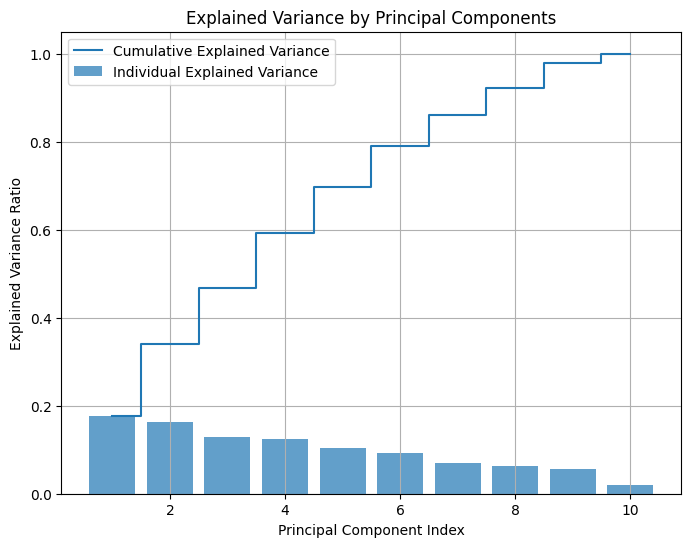

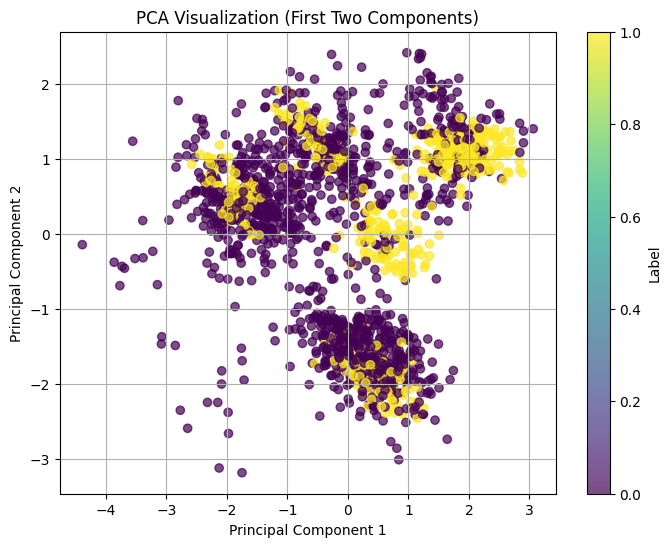

Explained Variance Ratios:
Principal Component 1: 0.1771 (17.71%)
Principal Component 2: 0.1621 (16.21%)
Principal Component 3: 0.1287 (12.87%)
Principal Component 4: 0.1254 (12.54%)
Principal Component 5: 0.1040 (10.40%)
Principal Component 6: 0.0921 (9.21%)
Principal Component 7: 0.0705 (7.05%)
Principal Component 8: 0.0625 (6.25%)
Principal Component 9: 0.0572 (5.72%)
Principal Component 10: 0.0204 (2.04%)

Principal Component 1:
  Ori_x: -0.4426
  Ori_y: -0.0581
  Ori_z: -0.4263
  Ori_w: -0.3685
  Pos_x: 0.4555
  Pos_y: 0.1734
  Pos_z: 0.4319
  Obj_Pos_x: -0.0240
  Obj_Pos_y: 0.0499
  Obj_Pos_z: 0.2369

Principal Component 2:
  Ori_x: 0.1360
  Ori_y: 0.6757
  Ori_z: -0.2974
  Ori_w: -0.3042
  Pos_x: -0.2905
  Pos_y: -0.4669
  Pos_z: 0.1351
  Obj_Pos_x: 0.0603
  Obj_Pos_y: 0.1331
  Obj_Pos_z: 0.0434

Principal Component 3:
  Ori_x: 0.3273
  Ori_y: -0.1782
  Ori_z: -0.0091
  Ori_w: 0.0481
  Pos_x: -0.3781
  Pos_y: 0.3114
  Pos_z: 0.2450
  Obj_Pos_x: 0.1293
  Obj_Pos_y: 0.4230
  Obj_P

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load data
file_path = 'GraspClassifierModel\data\F3_cube_train_dropped.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path).dropna()

# 数据准备
features = data.drop(columns=["Label"]).values
labels = data["Label"].values
feature_names = data.drop(columns=["Label"]).columns  # 获取特征名称

# 特征标准化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 将数据划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# 应用 PCA 并降维
num_components = min(features_scaled.shape[0], features_scaled.shape[1])  # 最大维度
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# 计算方差贡献率
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 可视化每个主成分的方差贡献率
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center',
        label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid',
         label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()

# 可视化 PCA 降维后的数据 (前两个主成分)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (First Two Components)')
plt.grid()
plt.show()

# 打印每个主成分的特征贡献率
print("Explained Variance Ratios:")
for i, variance in enumerate(explained_variance_ratio):
    print(f"Principal Component {i + 1}: {variance:.4f} ({variance * 100:.2f}%)")

# 打印每个主成分的特征贡献
components = pca.components_  # 获取主成分矩阵
for i, component in enumerate(components):
    print(f"\nPrincipal Component {i + 1}:")
    for j, weight in enumerate(component):
        print(f"  {feature_names[j]}: {weight:.4f}")

# 保存 scaler 和 PCA 模型
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca_model.pkl')
print("Scaler and PCA models saved.")

e:\ANACONDA\envs\tmp\lib\site-packages\xgboost\core.py:158: UserWarning: [01:17:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\ANACONDA\envs\tmp\lib\site-packages\xgboost\core.py:158: UserWarning: [01:17:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\ANACONDA\envs\tmp\lib\site-packages\xgboost\core.py:158: UserWarning: [01:17:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\ANACONDA\envs\tmp\lib\site-packages\xgboost\core.py:

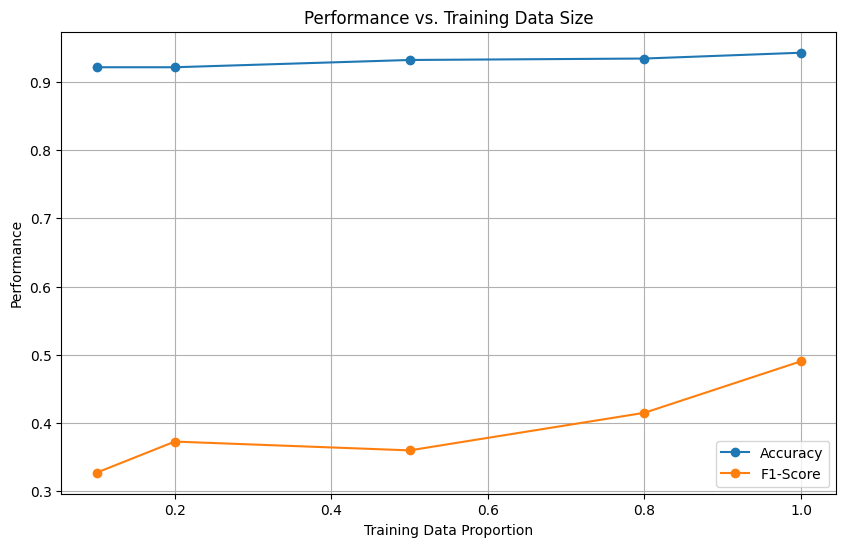

Scaler saved to scaler.pkl


In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import joblib
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 加载数据
file_path = 'GraspClassifierModel\\data\\F3_cube_train_dropped.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path).dropna()

# 数据准备
features = data.drop(columns=["Label"]).values
labels = data["Label"].values

# 特征标准化
scaler = StandardScaler()
features = scaler.fit_transform(features)

# 数据集划分
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# 数据集增量大小
subset_ratios = [0.1, 0.2, 0.5, 0.8, 1.0]  # 使用数据的比例
accuracies = []
f1_scores = []

# 增量训练和评估
for ratio in subset_ratios:
    subset_size = int(ratio * len(X_train))
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    # 创建模型
    model = XGBClassifier(
        n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
        use_label_encoder=False, eval_metric='logloss'
    )

    # 训练模型
    model.fit(X_train_subset, y_train_subset)

    # 在验证集上测试
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    accuracies.append(acc)
    f1_scores.append(f1)

# 绘制性能变化曲线
plt.figure(figsize=(10, 6))
plt.plot(subset_ratios, accuracies, label="Accuracy", marker='o')
plt.plot(subset_ratios, f1_scores, label="F1-Score", marker='o')
plt.xlabel("Training Data Proportion")
plt.ylabel("Performance")
plt.title("Performance vs. Training Data Size")
plt.legend()
plt.grid()
plt.show()

# 保存 scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved to scaler.pkl")


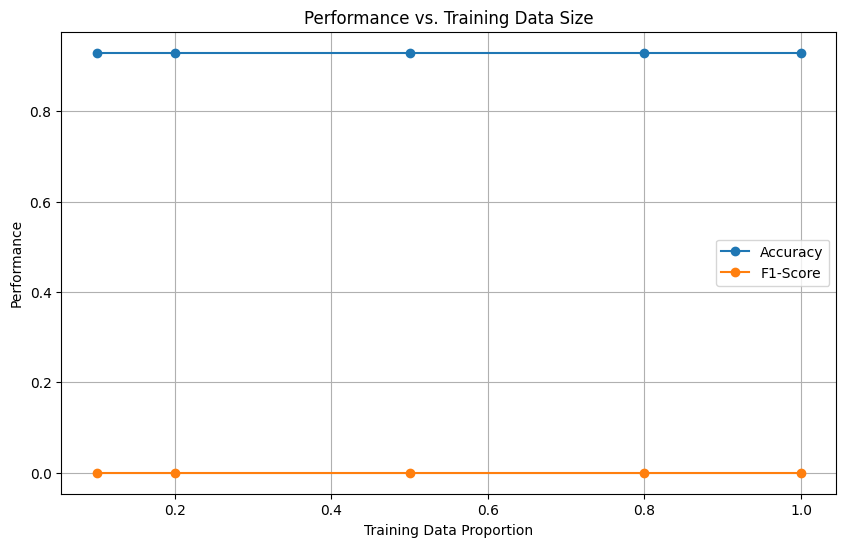

Scaler saved to scaler.pkl


In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib  # 用于保存/加载scaler

# Load data
file_path = 'GraspClassifierModel\data\PR2_Duck_train_dropped.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path).dropna()

# 数据准备
features = data.drop(columns=["Label"]).values
labels = data["Label"].values

# 特征标准化
scaler = StandardScaler()
features = scaler.fit_transform(features)

# 将数据划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# 定义PyTorch数据集
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)

# 定义模型
class SimpleNN(nn.Module):
    def __init__(self, input_dim, dropout, hidden_dim):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

# 增量训练和评估函数
def incremental_training(subset_ratios):
    accuracies = []
    f1_scores = []

    for ratio in subset_ratios:
        subset_size = int(ratio * len(X_train))
        train_subset = torch.utils.data.Subset(train_dataset, range(subset_size))
        train_loader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
        val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

        # 初始化模型、损失函数和优化器
        input_dim = features.shape[1]
        model = SimpleNN(input_dim, dropout=0.5, hidden_dim=64)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # 训练模型
        epochs = 20
        for epoch in range(epochs):
            model.train()
            for batch_features, batch_labels in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_features).squeeze()
                loss = criterion(outputs, batch_labels)
                loss.backward()
                optimizer.step()

        # 验证模型
        model.eval()
        correct = 0
        total = 0
        y_true = []
        y_pred = []
        with torch.no_grad():
            for val_features, val_labels in val_loader:
                outputs = model(val_features).squeeze()
                predictions = (outputs > 0.5).float()
                correct += (predictions == val_labels).sum().item()
                total += val_labels.size(0)
                y_true.extend(val_labels.tolist())
                y_pred.extend(predictions.tolist())

        accuracy = correct / total
        f1 = f1_score(y_true, y_pred)

        accuracies.append(accuracy)
        f1_scores.append(f1)

    return accuracies, f1_scores

# 数据集增量大小
subset_ratios = [0.1, 0.2, 0.5, 0.8, 1.0]  # 使用数据的比例
accuracies, f1_scores = incremental_training(subset_ratios)

# 绘制性能变化曲线
plt.figure(figsize=(10, 6))
plt.plot(subset_ratios, accuracies, label="Accuracy", marker='o')
plt.plot(subset_ratios, f1_scores, label="F1-Score", marker='o')
plt.xlabel("Training Data Proportion")
plt.ylabel("Performance")
plt.title("Performance vs. Training Data Size")
plt.legend()
plt.grid()
plt.show()

# 保存 scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved to scaler.pkl")
